In [1]:
# importing all the relevent libraries for analysis
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np


In [2]:
#loading the dataset from keras
fashion_mnist = keras.datasets.fashion_mnist


In [3]:
#splitting dataset to train and test sets
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

In [4]:
#displaing the size of the training dataset
x_train.shape

(60000, 28, 28)

In [5]:
#defining the diffrent class of items in the dataset 
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

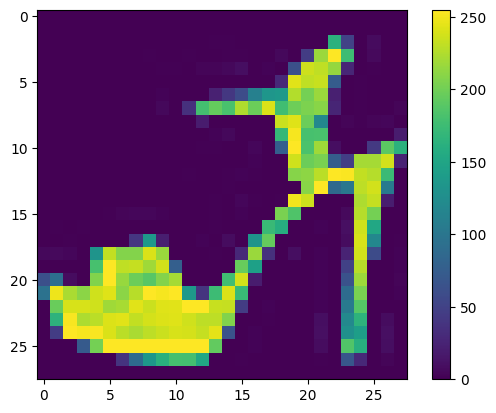

In [6]:
#displaying an image of any choosen items 
plt.figure()
plt.imshow(x_train[9])
plt.colorbar()
plt.grid(False)
plt.show()


In [7]:
x_train = x_train/255
x_test = x_test/255

In [4]:
class_names=['T_shirt/Top','Trousers','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankleboot']

<function matplotlib.pyplot.show(close=None, block=None)>

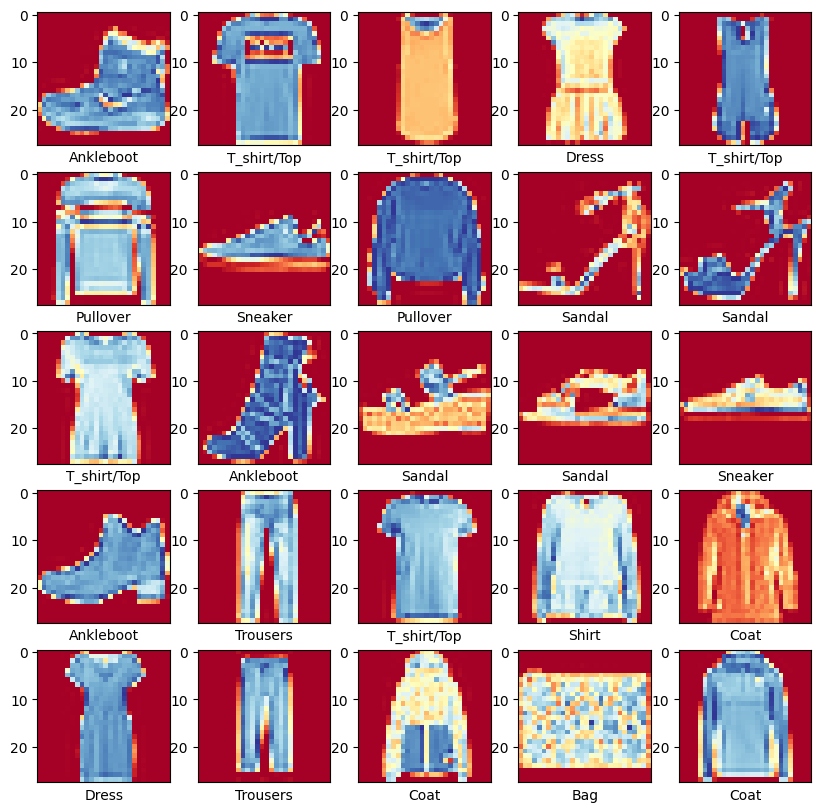

In [9]:
# displaying 25 items of the datasets 
plt.figure(figsize = (10,10))           
for i in range(25):          
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks()
    plt.grid(False)
    plt.imshow(x_train[i],cmap = 'RdYlBu')
    plt.xlabel(class_names[y_train[i]])
plt.show           

In [8]:
#training the model for prediction 
model = tf.keras.Sequential()         
model.add(tf.keras.layers.Flatten(input_shape=(28, 28,)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2)), 
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10)
model.save('handwritten.model')


Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5300 - accuracy: 0.8110
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3994 - accuracy: 0.8554
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3669 - accuracy: 0.8651
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3457 - accuracy: 0.8738
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3283 - accuracy: 0.8782
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3172 - accuracy: 0.8824
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3070 - accuracy: 0.8854
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2992 - accuracy: 0.8875
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2907 - accuracy: 0.8920
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.283

In [9]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 853us/step - loss: 0.3419 - accuracy: 0.8794


[0.34186995029449463, 0.8794000148773193]

In [10]:
prediction = model.predict(x_test)

313/313 [==============================] - 0s 758us/step


In [ ]:
#print(len(prediction))

#print(prediction[2])
plt.imshow(x_test[2])
plt.show()

<Figure size 1000x1000 with 0 Axes>

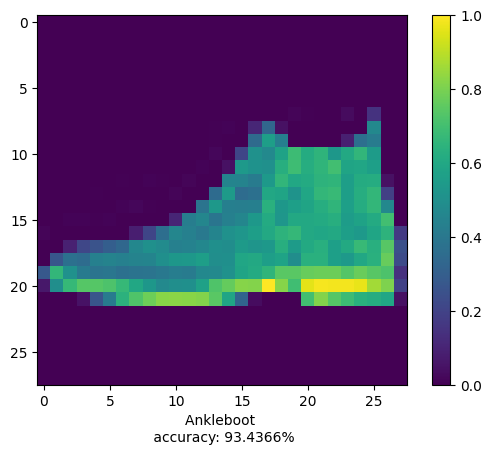

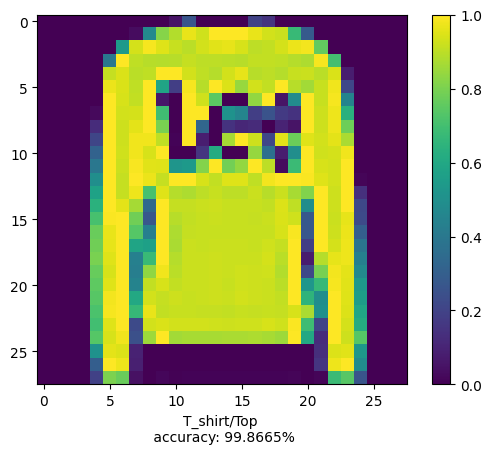

In [22]:
#Displaying at least two images of the predicted model
plt.figure(figsize = (10,10))
for i in range (2):
    
    plt.figure()
    plt.imshow(x_test[i])
    plt.colorbar()
    plt.grid(False)
    #plt.xlabel(class_names[y_train[i]] + " - accuracy:" + str(max(prediction[i])*100) + "%")
    plt.xlabel(f"{class_names[y_train[i]]} \n accuracy: {max(prediction[i])*100:.4f}%")
    plt.show()
    